In [2]:
import xgboost
print("xgboost installed successfully!")
exit()

xgboost installed successfully!


Import Necessary Libraries

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

Importing the Dataset

In [4]:
data=pd.read_csv(r"traffic volume.csv")

In [5]:
print(data)

      holiday    temp  rain  snow       weather        date      Time  \
0         NaN  288.28   0.0   0.0        Clouds  02-10-2012  09:00:00   
1         NaN  289.36   0.0   0.0        Clouds  02-10-2012  10:00:00   
2         NaN  289.58   0.0   0.0        Clouds  02-10-2012  11:00:00   
3         NaN  290.13   0.0   0.0        Clouds  02-10-2012  12:00:00   
4         NaN  291.14   0.0   0.0        Clouds  02-10-2012  13:00:00   
...       ...     ...   ...   ...           ...         ...       ...   
48199     NaN  283.45   0.0   0.0        Clouds  30-09-2018  19:00:00   
48200     NaN  282.76   0.0   0.0        Clouds  30-09-2018  20:00:00   
48201     NaN  282.73   0.0   0.0  Thunderstorm  30-09-2018  21:00:00   
48202     NaN  282.09   0.0   0.0        Clouds  30-09-2018  22:00:00   
48203     NaN  282.12   0.0   0.0        Clouds  30-09-2018  23:00:00   

       traffic_volume  
0                5545  
1                4516  
2                4767  
3                5026  
4  

Analyse the data

In [6]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [7]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


Handling Missing Values

In [9]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [10]:
data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)

C:\Users\SRINIVAS\AppData\Local\Temp\ipykernel_14976\3727727439.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['temp'].fillna(data['temp'].mean(),inplace=True)
C:\Users\SRINIVAS\AppData\Local\Temp\ipykernel_14976\3727727439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [11]:
from collections import Counter

print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [12]:
data['weather'].fillna('clouds',inplace=True)

C:\Users\SRINIVAS\AppData\Local\Temp\ipykernel_21376\977435935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weather'].fillna('clouds',inplace=True)


Data Visualization

In [13]:
cor = data.select_dtypes(include=['number']).corr()
print(cor)

                    temp      rain      snow  traffic_volume
temp            1.000000  0.009070 -0.019758        0.130034
rain            0.009070  1.000000 -0.000090        0.004714
snow           -0.019758 -0.000090  1.000000        0.000735
traffic_volume  0.130034  0.004714  0.000735        1.000000


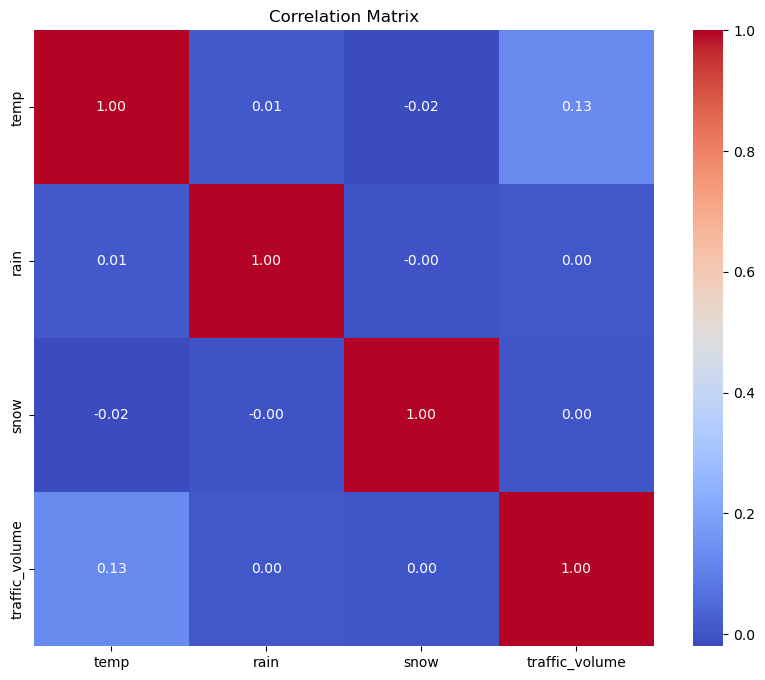

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


<Axes: >

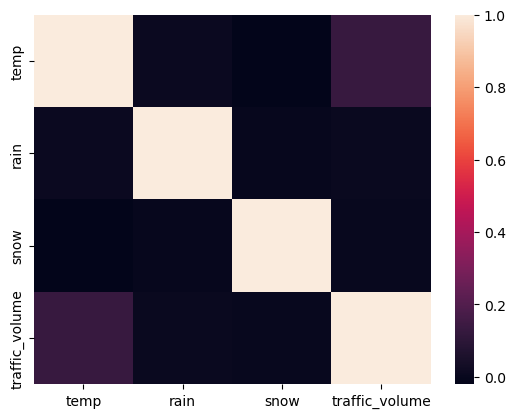

In [16]:
sns.heatmap(cor)

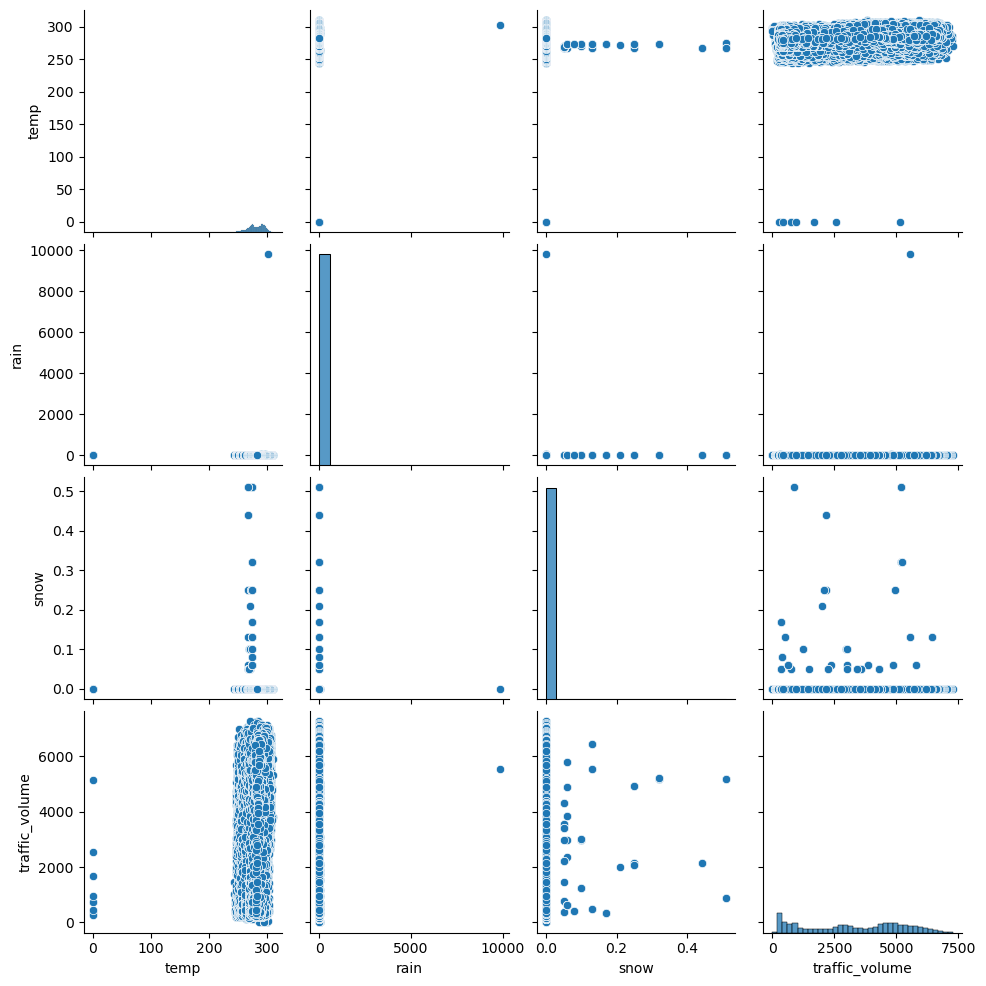

In [17]:
sns.pairplot(data)

<Axes: >

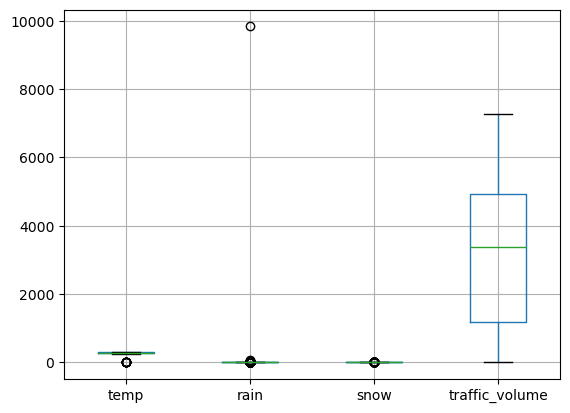

In [18]:
data.boxplot()

In [19]:
data=pd.read_csv(r"C:\Users\SRINIVAS\OneDrive\Desktop\TrafficVolumeProject\traffic volume.csv")

In [20]:
print(data.columns)


Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'date', 'Time',
       'traffic_volume'],
      dtype='object')


In [21]:
data[["day","month","year"]] = data["date"].str.split("-", expand=True)


In [22]:
data[["hours", "minutes", "seconds"]] = data["Time"].str.split(":", expand=True)

Splitting the Dataset into Dependent and Independent variable

In [25]:
y=data['traffic_volume']
x=data.drop(columns=['traffic_volume'],axis=1)

Feature Scaling

In [26]:
names=x.columns

In [27]:
from sklearn.preprocessing import scale

In [28]:
from sklearn.preprocessing import StandardScaler

# Step 1: Convert categorical columns to numeric (Label Encoding or OneHot)
# Let's use Label Encoding for simplicity
from sklearn.preprocessing import LabelEncoder

label_cols = ['holiday', 'weather']
le = LabelEncoder()

for col in label_cols:
    x[col] = le.fit_transform(x[col].astype(str))  # Convert to string just in case

# Step 2: Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [29]:
x=scale(x)

In [30]:
x=pd.DataFrame(x,columns=names)

In [31]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.031687,0.530193,-0.007463,-0.027232,-0.567564,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.031687,0.611131,-0.007463,-0.027232,-0.567564,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.031687,0.627618,-0.007463,-0.027232,-0.567564,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.031687,0.668837,-0.007463,-0.027232,-0.567564,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.031687,0.744529,-0.007463,-0.027232,-0.567564,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


Splitting the data into Train and Test

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Model Bilding

>Training and Testing the Model

In [33]:
from sklearn import linear_model

from sklearn import tree

from sklearn import ensemble

from sklearn import svm

import xgboost


In [34]:
lin_reg =linear_model.LinearRegression()

Dtree= tree.DecisionTreeRegressor()

Rand =ensemble.RandomForestRegressor()

svr = svm.SVR()

XGB = xgboost.XGBRegressor()

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median' or 'most_frequent'
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


In [36]:
lin_reg.fit(x_train,y_train)

Dtree.fit(x_train,y_train)

Rand.fit(x_train,y_train)

svr.fit(x_train,y_train)

XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [37]:
from xgboost import XGBRegressor

# Create the model with basic parameters
xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)

# Train the model
xgb_model.fit(x_train, y_train)

# Predict on test data
predictions = xgb_model.predict(x_test)


In [38]:
p1=lin_reg.predict(x_train)

p2=Dtree.predict(x_train)

p3=Rand.predict(x_train)

p4= svr.predict(x_train)

p5= XGB.predict(x_train)

>Model Evaluation

In [51]:
from sklearn import metrics

print(metrics.r2_score(p1,y_train))

print(metrics.r2_score (p2,y_train))

print(metrics.r2_score(p3,y_train))

print(metrics.r2_score (p4,y_train))

print(metrics.r2_score(p5,y_train))


-5.501465030741672
1.0
0.9749702873644299
-12.204587054900315
0.8486046195030212


In [ ]:
p2 =Dtree.predict(x_test)

p3 =Rand.predict(x_test)

p4 =svr.predict(x_test)

p5 =XGB.predict(x_test)



In [79]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

0.8074051737785339
0.6934367887235955
0.8045796544455066
-11.984103259310965
0.8074051737785339


In [ ]:
MSE=metrics.mean_squared_error(p3,y_test)
np.sqrt(MSE)

Save the Model

In [80]:
import pickle

In [81]:
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))